In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import CSV file

In [2]:
file = pd.read_csv('/Users/Dataset/NEPSE.csv')

In [3]:
file.shape

(1026, 8)

In [4]:
file.sort_values(by='Date', inplace=True)
file.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
1025,NEPSE,2019-01-01,1187.30,1196.18,1183.84,1185.91,0.00,227166000.0
1024,NEPSE,2019-01-02,1185.91,1186.90,1180.43,1180.43,0.00,246231008.0
1023,NEPSE,2019-01-03,1180.47,1184.95,1178.06,1178.87,0.00,262468000.0
1022,NEPSE,2019-01-06,1178.25,1181.58,1170.11,1170.79,0.00,298870016.0
1021,NEPSE,2019-01-07,1170.72,1181.17,1170.36,1177.46,0.00,322203008.0


In [5]:
file['Date']= pd.to_datetime(file['Date'])

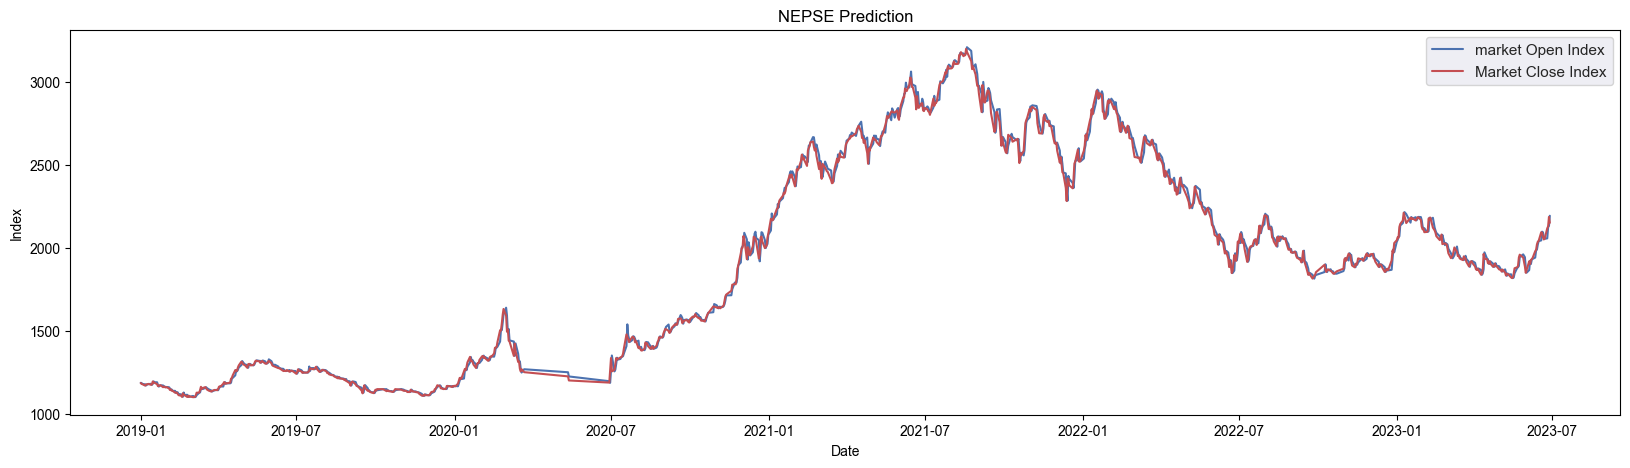

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style='dark')
ax.plot(file['Date'],file['Open'], c='b', label='market Open Index')
ax.plot(file['Date'],file['Close'], c='r', label='Market Close Index')
ax.set(xlabel='Date', ylabel='Index', title='NEPSE Prediction')
ax.legend()
plt.show()

In [7]:
df= file.iloc[:,2:8]

In [8]:
df.head()

,Open,High,Low,Close,Percent Change,Volume
1025,1187.30,1196.18,1183.84,1185.91,0.00,227166000.0
1024,1185.91,1186.90,1180.43,1180.43,0.00,246231008.0
1023,1180.47,1184.95,1178.06,1178.87,0.00,262468000.0
1022,1178.25,1181.58,1170.11,1170.79,0.00,298870016.0
1021,1170.72,1181.17,1170.36,1177.46,0.00,322203008.0


In [9]:
df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Percent Change     object
Volume            float64
dtype: object

###### Droping unnecessary row having data '--'

In [10]:
df = df.drop(df[df['Percent Change']=='--'].index,axis=0)

###### Changing 'percentage change' data type to float

In [11]:
df['Percent Change'] = pd.to_numeric(df['Percent Change'])

In [12]:
df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Percent Change    float64
Volume            float64
dtype: object

###### Scaling the data to 0-1

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

###### Spliting Train and Test sample for LSTM

In [14]:
xtrain = []
ytrain = []
future_data =1
past_data=10

for i in range(past_data, len(df)-1):
    xtrain.append(df[i-past_data:i,0:6])
    ytrain.append(df[i,0])

###### Converting matrix data into array

In [15]:
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [16]:
print("Train data sehpe: ",xtrain.shape)
print("Test data shape: ",ytrain.shape)

Train data sehpe:  (1014, 10, 6)
Test data shape:  (1014,)


## Build a LSTM model

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, LeakyReLU
from keras.layers.normalization import batch_normalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import tensorflow

In [18]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(10,6), activation = 'relu', return_sequences=True))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(LSTM(units=64, activation='relu',return_sequences=False))

model.add(Dense(units=1))
opt = Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer= opt, metrics='mae')

Metal device set to: Apple M2


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 84,289
Trainable params: 84,289
Non-trainable params: 0
_________________________________________________________________


In [20]:
ess = EarlyStopping(monitor='loss', patience=5)

In [21]:
history = model.fit(xtrain, ytrain, epochs=100, validation_split=0.2, shuffle=False , callbacks=[ess])

Epoch 1/100


2023-07-03 11:44:21.184023: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


26/26 [==============================] - 15s 514ms/step - loss: 1.2391 - mae: 1.0243 - val_loss: 0.0285 - val_mae: 0.1286
Epoch 2/100
26/26 [==============================] - 17s 658ms/step - loss: 1.1735 - mae: 0.9963 - val_loss: 0.0267 - val_mae: 0.1253
Epoch 3/100
26/26 [==============================] - 17s 662ms/step - loss: 1.1007 - mae: 0.9644 - val_loss: 0.0243 - val_mae: 0.1209
Epoch 4/100
26/26 [==============================] - 17s 667ms/step - loss: 0.9904 - mae: 0.9144 - val_loss: 0.0212 - val_mae: 0.1149
Epoch 5/100
26/26 [==============================] - 17s 662ms/step - loss: 0.8168 - mae: 0.8299 - val_loss: 0.0177 - val_mae: 0.1085
Epoch 6/100
26/26 [==============================] - 18s 678ms/step - loss: 0.5356 - mae: 0.6664 - val_loss: 0.0151 - val_mae: 0.1053
Epoch 7/100
26/26 [==============================] - 18s 684ms/step - loss: 0.2613 - mae: 0.4330 - val_loss: 0.0129 - val_mae: 0.0940
Epoch 8/100
26/26 [==============================] - 17s 644ms/step - loss

Epoch 62/100
26/26 [==============================] - 17s 670ms/step - loss: 0.0143 - mae: 0.0891 - val_loss: 0.0044 - val_mae: 0.0508
Epoch 63/100
26/26 [==============================] - 17s 657ms/step - loss: 0.0115 - mae: 0.0829 - val_loss: 0.0068 - val_mae: 0.0668
Epoch 64/100
26/26 [==============================] - 16s 616ms/step - loss: 0.0142 - mae: 0.0896 - val_loss: 0.0042 - val_mae: 0.0500
Epoch 65/100
26/26 [==============================] - 16s 614ms/step - loss: 0.0118 - mae: 0.0856 - val_loss: 0.0072 - val_mae: 0.0688
Epoch 66/100
26/26 [==============================] - 16s 616ms/step - loss: 0.0142 - mae: 0.0906 - val_loss: 0.0041 - val_mae: 0.0504


## Accuracy Visualize

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

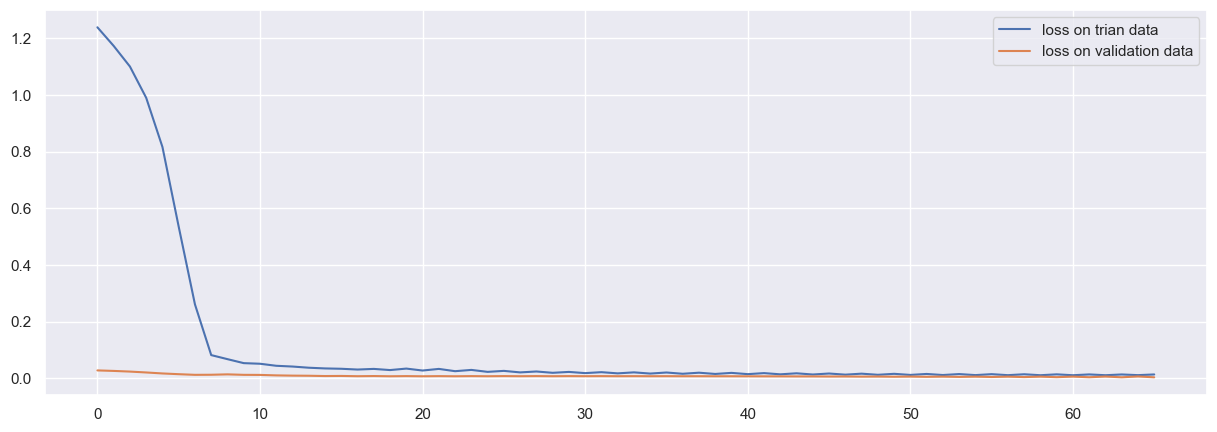

In [23]:
plt.figure(figsize=(15,5))
sns.set_theme(style='darkgrid')
plt.plot(history.history['loss'],label='loss on trian data')
plt.plot(history.history['val_loss'],label='loss on validation data')
plt.legend()
plt.show();

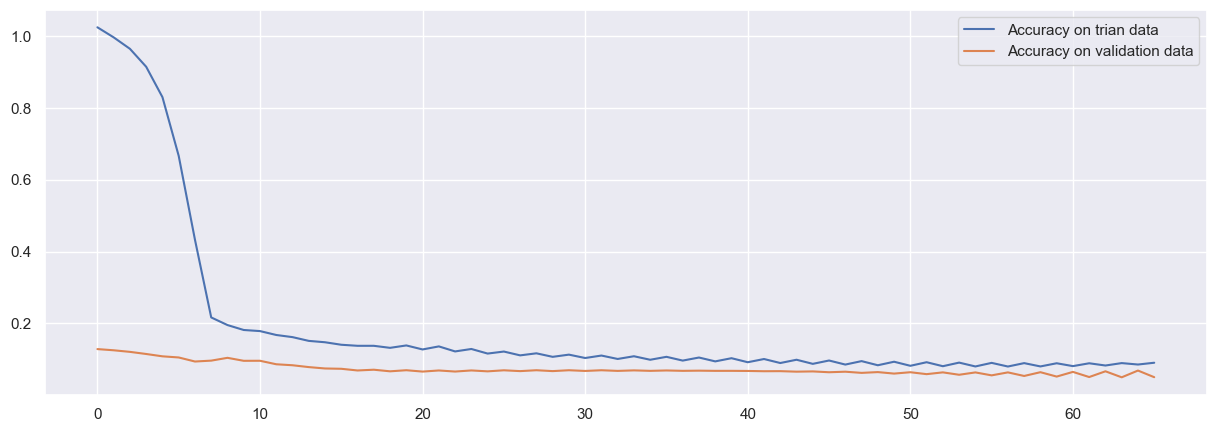

In [24]:
plt.figure(figsize=(15,5))
sns.set_theme(style='darkgrid')
plt.plot(history.history['mae'],label='Accuracy on trian data')
plt.plot(history.history['val_mae'],label='Accuracy on validation data')
plt.legend()
plt.show();

## Forcasting for more 200 days 

In [25]:
future_data=200
forcast_period_data = pd.date_range((list(file['Date'])[-1]),periods=future_data, freq='1d')
forecast=model.predict(xtrain[-future_data:])
# forecast=model.predict(xtrain[forcast_period_data])

7/7 [==============================] - 1s 55ms/step


###### initially we have scaled 6 featured data so scaler wants same diamention data to inverse transform, so to me same dimaention same column is repeated 6 times

In [26]:
forcast_period_data[0]

Timestamp('2023-06-28 00:00:00', freq='D')

In [27]:
forecast_copy= np.repeat(forecast,6, axis=-1)

In [28]:
y_future_predict = scaler.inverse_transform(forecast_copy)[:,0]

###### Appending bvefore and after prediction value on dataframe

In [29]:
final_date=[]
for i in file['Date']:
    final_date.append(i.date())
    
for i in forcast_period_data:
    final_date.append(i.date())
    
Open_index=[]
for i in file['Open']:
    Open_index.append(i)
    
for i in y_future_predict:
    Open_index.append(i)

In [30]:
print(len(final_date))
print(len(Open_index))

1226
1226


In [31]:
Final_Data = pd.DataFrame({'Date': final_date, 'Market_Open_Index': Open_index})
Final_Data

,Date,Market_Open_Index
0,2019-01-01,1187.300000
1,2019-01-02,1185.910000
2,2019-01-03,1180.470000
3,2019-01-06,1178.250000
4,2019-01-07,1170.720000
...,...,...
1221,2024-01-09,2096.677979
1222,2024-01-10,2099.199707
1223,2024-01-11,2099.817139
1224,2024-01-12,2115.392822


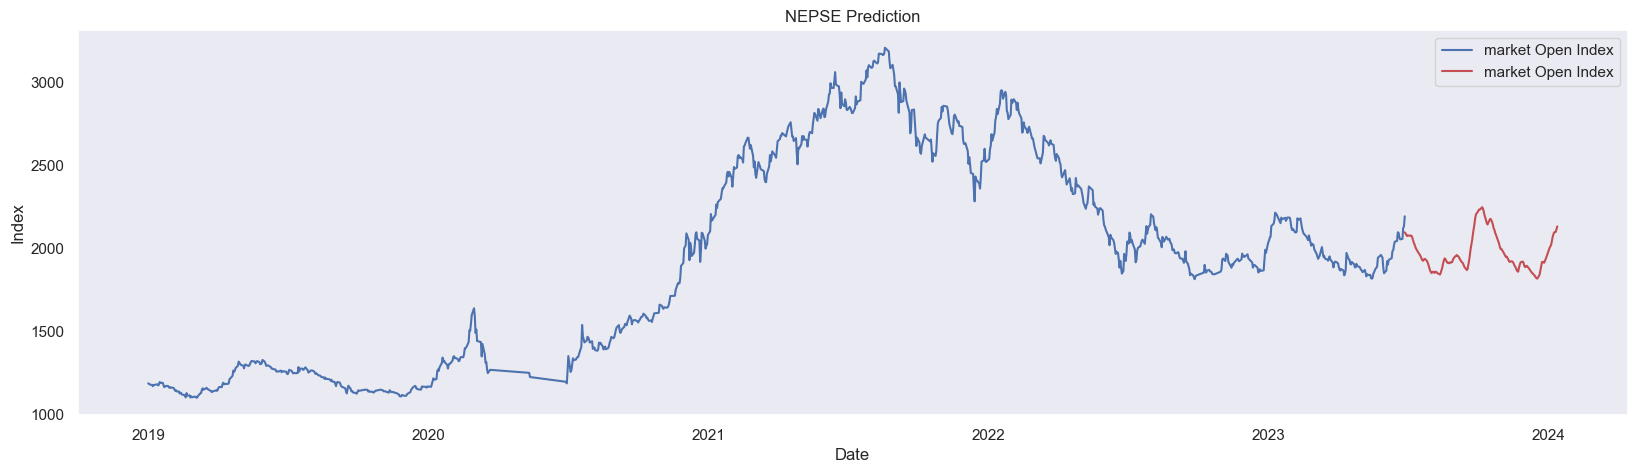

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style='dark')
ax.plot(Final_Data.iloc[0:1026,0:1],Final_Data.iloc[0:1026,1:], c='b', label='market Open Index')
ax.plot(Final_Data.iloc[1026:,0:1],Final_Data.iloc[1026:,1:], c='r', label='market Open Index')
ax.set(xlabel='Date', ylabel='Index', title='NEPSE Prediction')
ax.legend()
plt.show()